In [35]:
import seaborn as sns
import plotly as ply
import pandas as pd
from matplotlib import pyplot as plt

In [36]:
!pip3 install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
!pip3 install plotly
!pip3 install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
data = pd.read_csv("./order_items.csv")
data.head()

id  order_id  user_id  product_id  inventory_item_id    status  \
0   16000     10975     8831       13606              43216  Complete   
1   58903     40591    32637       13606             159361  Complete   
2  160715    110826    88857       13606             434265  Returned   
3   40331     27796    22443       28951             109154   Shipped   
4   83959     57928    46609       28951             227036   Shipped   

                created_at               shipped_at             delivered_at  \
0  2020-09-14 17:59:04 UTC  2020-09-16 12:05:00 UTC  2020-09-17 21:47:00 UTC   
1  2023-07-26 06:59:00 UTC  2023-07-28 07:38:00 UTC  2023-08-01 06:03:00 UTC   
2  2023-07-11 05:19:49 UTC  2023-07-12 13:45:00 UTC  2023-07-12 21:41:00 UTC   
3  2023-06-01 17:44:45 UTC  2023-06-04 17:26:00 UTC                      NaN   
4  2023-06-28 05:57:34 UTC  2023-06-29 16:56:00 UTC                      NaN   

               returned_at  sale_price  
0                      NaN         2.5  
1                      NaN         2.5  
2  2023-07-13 21:15:00 UTC         2.5  
3                      NaN         3.0  
4                      NaN         3.0

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180976 entries, 0 to 180975
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 180976 non-null  int64  
 1   order_id           180976 non-null  int64  
 2   user_id            180976 non-null  int64  
 3   product_id         180976 non-null  int64  
 4   inventory_item_id  180976 non-null  int64  
 5   status             180976 non-null  object 
 6   created_at         180976 non-null  object 
 7   shipped_at         118302 non-null  object 
 8   delivered_at       63484 non-null   object 
 9   returned_at        18117 non-null   object 
 10  sale_price         180976 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 15.2+ MB


In [40]:
from dateutil import parser

In [41]:
data['created_at'] = data['created_at'].map(parser.parse)
data.head()

id  order_id  user_id  product_id  inventory_item_id    status  \
0   16000     10975     8831       13606              43216  Complete   
1   58903     40591    32637       13606             159361  Complete   
2  160715    110826    88857       13606             434265  Returned   
3   40331     27796    22443       28951             109154   Shipped   
4   83959     57928    46609       28951             227036   Shipped   

                 created_at               shipped_at             delivered_at  \
0 2020-09-14 17:59:04+00:00  2020-09-16 12:05:00 UTC  2020-09-17 21:47:00 UTC   
1 2023-07-26 06:59:00+00:00  2023-07-28 07:38:00 UTC  2023-08-01 06:03:00 UTC   
2 2023-07-11 05:19:49+00:00  2023-07-12 13:45:00 UTC  2023-07-12 21:41:00 UTC   
3 2023-06-01 17:44:45+00:00  2023-06-04 17:26:00 UTC                      NaN   
4 2023-06-28 05:57:34+00:00  2023-06-29 16:56:00 UTC                      NaN   

               returned_at  sale_price  
0                      NaN         2.5  
1                      NaN         2.5  
2  2023-07-13 21:15:00 UTC         2.5  
3                      NaN         3.0  
4                      NaN         3.0

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180976 entries, 0 to 180975
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype                  
---  ------             --------------   -----                  
 0   id                 180976 non-null  int64                  
 1   order_id           180976 non-null  int64                  
 2   user_id            180976 non-null  int64                  
 3   product_id         180976 non-null  int64                  
 4   inventory_item_id  180976 non-null  int64                  
 5   status             180976 non-null  object                 
 6   created_at         180976 non-null  datetime64[ns, tzutc()]
 7   shipped_at         118302 non-null  object                 
 8   delivered_at       63484 non-null   object                 
 9   returned_at        18117 non-null   object                 
 10  sale_price         180976 non-null  float64                
dtypes: datetime64[ns, tzutc()](1), float64(

In [43]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['shipped_at'] = pd.to_datetime(data['shipped_at'], errors='coerce')
data['delivered_at'] = pd.to_datetime(data['delivered_at'], errors='coerce')
data['returned_at'] = pd.to_datetime(data['returned_at'], errors='coerce')

data.head()

id  order_id  user_id  product_id  inventory_item_id    status  \
0   16000     10975     8831       13606              43216  Complete   
1   58903     40591    32637       13606             159361  Complete   
2  160715    110826    88857       13606             434265  Returned   
3   40331     27796    22443       28951             109154   Shipped   
4   83959     57928    46609       28951             227036   Shipped   

                 created_at                shipped_at  \
0 2020-09-14 17:59:04+00:00 2020-09-16 12:05:00+00:00   
1 2023-07-26 06:59:00+00:00 2023-07-28 07:38:00+00:00   
2 2023-07-11 05:19:49+00:00 2023-07-12 13:45:00+00:00   
3 2023-06-01 17:44:45+00:00 2023-06-04 17:26:00+00:00   
4 2023-06-28 05:57:34+00:00 2023-06-29 16:56:00+00:00   

               delivered_at               returned_at  sale_price  
0 2020-09-17 21:47:00+00:00                       NaT         2.5  
1 2023-08-01 06:03:00+00:00                       NaT         2.5  
2 2023-07-12 21:41:00+00:00 2023-07-13 21:15:00+00:00         2.5  
3                       NaT                       NaT         3.0  
4                       NaT                       NaT         3.0

In [44]:
data['status'].value_counts()

status
Shipped       54818
Complete      45367
Processing    35727
Cancelled     26947
Returned      18117
Name: count, dtype: int64

<Axes: title={'center': 'Status Distribution'}, ylabel='count'>

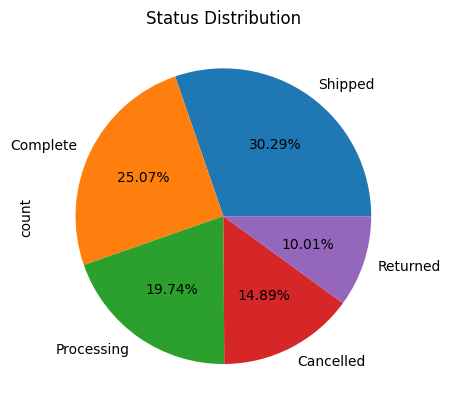

In [45]:
data['status'].value_counts().plot.pie(title='Status Distribution', autopct='%.2f%%')

In [46]:
value_counts = data['status'].value_counts().to_dict()
value_counts

{'Shipped': 54818,
 'Complete': 45367,
 'Processing': 35727,
 'Cancelled': 26947,
 'Returned': 18117}

In [47]:
count_values = list(value_counts.values())
count_labels = list(value_counts.keys())

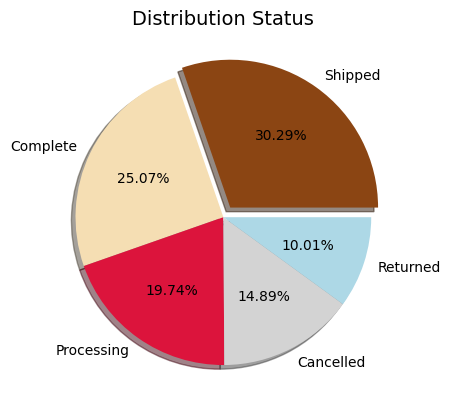

In [48]:
explode = [0.08, 0.0, 0.0, 0.0, 0.0]
colors = ['saddlebrown', 'wheat', 'crimson', 'lightgrey','lightblue']
plt.pie(count_values, 
        explode=explode, 
        labels=count_labels, 
        colors=colors, 
        autopct='%.2f%%',    # here we also add the % sign 
        shadow=True)
plt.title('Distribution Status', fontsize=14)
plt.show()

In [49]:
fig = ply.graph_objects.Figure(
    data=[
        ply.graph_objects.Pie(labels=count_labels, values=count_values, pull=explode)]
    )
fig.update_layout(title_text="Status Distribution")
fig.show()

In [50]:
data['created_at'][0].hour

17

In [51]:
data['hour'] = data['created_at'].map(lambda ts: ts.hour)
data.head()

id  order_id  user_id  product_id  inventory_item_id    status  \
0   16000     10975     8831       13606              43216  Complete   
1   58903     40591    32637       13606             159361  Complete   
2  160715    110826    88857       13606             434265  Returned   
3   40331     27796    22443       28951             109154   Shipped   
4   83959     57928    46609       28951             227036   Shipped   

                 created_at                shipped_at  \
0 2020-09-14 17:59:04+00:00 2020-09-16 12:05:00+00:00   
1 2023-07-26 06:59:00+00:00 2023-07-28 07:38:00+00:00   
2 2023-07-11 05:19:49+00:00 2023-07-12 13:45:00+00:00   
3 2023-06-01 17:44:45+00:00 2023-06-04 17:26:00+00:00   
4 2023-06-28 05:57:34+00:00 2023-06-29 16:56:00+00:00   

               delivered_at               returned_at  sale_price  hour  
0 2020-09-17 21:47:00+00:00                       NaT         2.5    17  
1 2023-08-01 06:03:00+00:00                       NaT         2.5     6  
2 2023-07-12 21:41:00+00:00 2023-07-13 21:15:00+00:00         2.5     5  
3                       NaT                       NaT         3.0    17  
4                       NaT                       NaT         3.0     5

In [52]:
import pytz


In [53]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['shipped_at'] = pd.to_datetime(data['shipped_at'], errors='coerce')
data['delivered_at'] = pd.to_datetime(data['delivered_at'], errors='coerce')
data['returned_at'] = pd.to_datetime(data['returned_at'], errors='coerce')
data['created_at'] = data['created_at'].dt.tz_localize(None).dt.tz_localize('UTC').dt.tz_convert('Asia/Jakarta')
data['shipped_at'] = data['shipped_at'].dt.tz_localize(None).dt.tz_localize('UTC').dt.tz_convert('Asia/Jakarta')
data['delivered_at'] = data['delivered_at'].dt.tz_localize(None).dt.tz_localize('UTC').dt.tz_convert('Asia/Jakarta')
data['returned_at'] = data['returned_at'].dt.tz_localize(None).dt.tz_localize('UTC').dt.tz_convert('Asia/Jakarta')

In [54]:
data.head()

id  order_id  user_id  product_id  inventory_item_id    status  \
0   16000     10975     8831       13606              43216  Complete   
1   58903     40591    32637       13606             159361  Complete   
2  160715    110826    88857       13606             434265  Returned   
3   40331     27796    22443       28951             109154   Shipped   
4   83959     57928    46609       28951             227036   Shipped   

                 created_at                shipped_at  \
0 2020-09-15 00:59:04+07:00 2020-09-16 19:05:00+07:00   
1 2023-07-26 13:59:00+07:00 2023-07-28 14:38:00+07:00   
2 2023-07-11 12:19:49+07:00 2023-07-12 20:45:00+07:00   
3 2023-06-02 00:44:45+07:00 2023-06-05 00:26:00+07:00   
4 2023-06-28 12:57:34+07:00 2023-06-29 23:56:00+07:00   

               delivered_at               returned_at  sale_price  hour  
0 2020-09-18 04:47:00+07:00                       NaT         2.5    17  
1 2023-08-01 13:03:00+07:00                       NaT         2.5     6  
2 2023-07-13 04:41:00+07:00 2023-07-14 04:15:00+07:00         2.5     5  
3                       NaT                       NaT         3.0    17  
4                       NaT                       NaT         3.0     5

In [55]:
grouped_hour = data.groupby(['hour'])['id'].count()
grouped_hour

hour
0     9482
1     9220
2     9352
3     9617
4     9631
5     9705
6     9577
7     9628
8     9404
9     9581
10    9402
11    9445
12    9350
13    9648
14    9482
15    8794
16    6574
17    4004
18    1647
19      51
20     756
21    3209
22    5462
23    7955
Name: id, dtype: int64

<Axes: title={'center': 'Order Hours'}, xlabel='Hour', ylabel='count'>

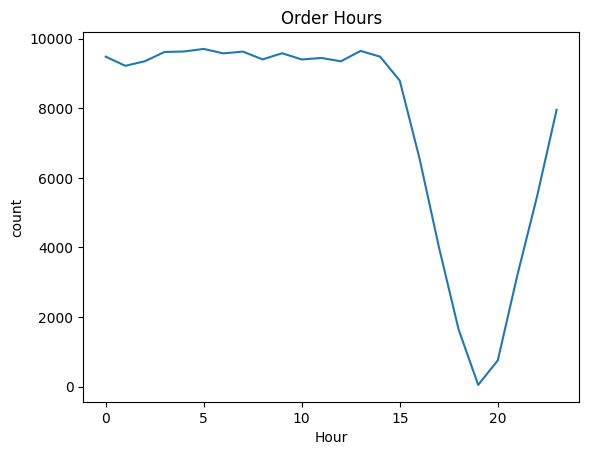

In [56]:
grouped_hour.plot.line(title='Order Hours', xlabel='Hour', ylabel='count')

<Axes: title={'center': 'Order Hours'}, xlabel='Hour', ylabel='count'>

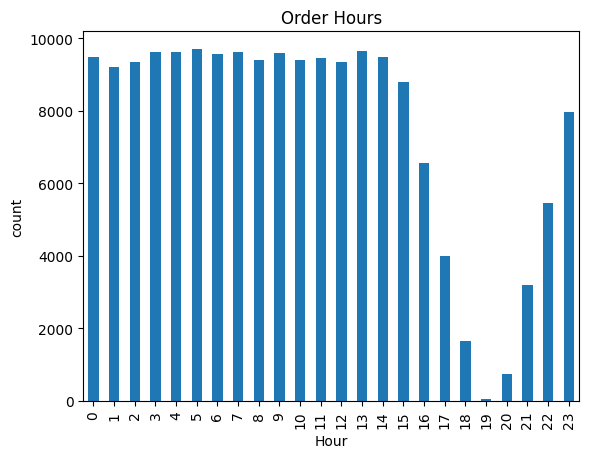

In [57]:
grouped_hour.plot.bar(title='Order Hours', xlabel='Hour', ylabel='count')

<Axes: title={'center': 'Order Hours'}, xlabel='Count', ylabel='Hour'>

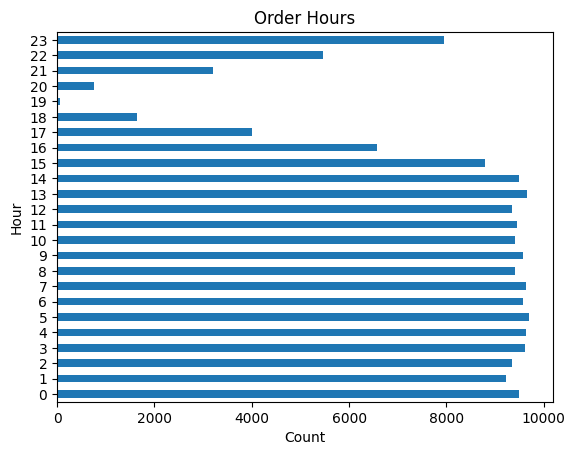

In [58]:
grouped_hour.plot.barh(title='Order Hours', xlabel='Count', ylabel='Hour')

In [59]:
fig = ply.graph_objects.Figure(
    data=[
        ply.graph_objects.Pie(labels=list(grouped_hour.to_dict().keys()), values=list(grouped_hour.to_dict().values()))]
    )
fig.update_layout(title_text="Orders Hour")
fig.show()

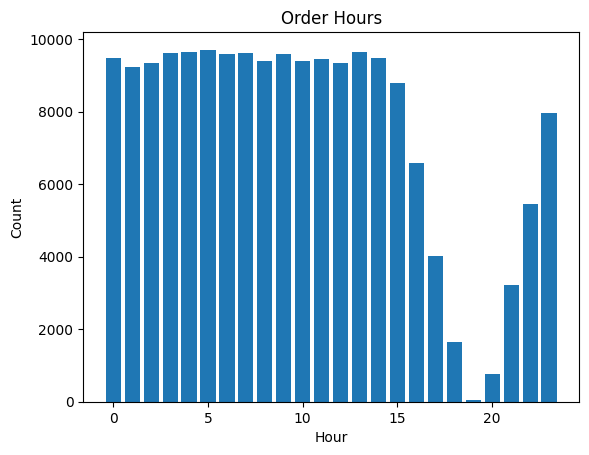

In [60]:
import matplotlib.pyplot as plt
grouped_hour = data.groupby(['hour'])['id'].count()
plt.bar(grouped_hour.index, grouped_hour.values)
plt.title('Order Hours')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

In [61]:
import plotly.express as px
grouped_hour = data.groupby(['hour'])['id'].count().reset_index(name='count')
fig = px.bar(grouped_hour, x='hour', y='count', labels={'hour': 'Hour', 'count': 'Count'}, title='Order Hours')
fig.show()

In [62]:
data.head()

id  order_id  user_id  product_id  inventory_item_id    status  \
0   16000     10975     8831       13606              43216  Complete   
1   58903     40591    32637       13606             159361  Complete   
2  160715    110826    88857       13606             434265  Returned   
3   40331     27796    22443       28951             109154   Shipped   
4   83959     57928    46609       28951             227036   Shipped   

                 created_at                shipped_at  \
0 2020-09-15 00:59:04+07:00 2020-09-16 19:05:00+07:00   
1 2023-07-26 13:59:00+07:00 2023-07-28 14:38:00+07:00   
2 2023-07-11 12:19:49+07:00 2023-07-12 20:45:00+07:00   
3 2023-06-02 00:44:45+07:00 2023-06-05 00:26:00+07:00   
4 2023-06-28 12:57:34+07:00 2023-06-29 23:56:00+07:00   

               delivered_at               returned_at  sale_price  hour  
0 2020-09-18 04:47:00+07:00                       NaT         2.5    17  
1 2023-08-01 13:03:00+07:00                       NaT         2.5     6  
2 2023-07-13 04:41:00+07:00 2023-07-14 04:15:00+07:00         2.5     5  
3                       NaT                       NaT         3.0    17  
4                       NaT                       NaT         3.0     5

In [63]:
data['year'] = data['created_at'].map(lambda ts: ts.year)
data.year.max(), data.year.min()

(2023, 2019)

In [64]:
latest_data = data[data['year'] == data.year.max()].copy()
latest_data.head()

id  order_id  user_id  product_id  inventory_item_id    status  \
1   58903     40591    32637       13606             159361  Complete   
2  160715    110826    88857       13606             434265  Returned   
3   40331     27796    22443       28951             109154   Shipped   
4   83959     57928    46609       28951             227036   Shipped   
6  169379    116754    93660       28951             457617   Shipped   

                 created_at                shipped_at  \
1 2023-07-26 13:59:00+07:00 2023-07-28 14:38:00+07:00   
2 2023-07-11 12:19:49+07:00 2023-07-12 20:45:00+07:00   
3 2023-06-02 00:44:45+07:00 2023-06-05 00:26:00+07:00   
4 2023-06-28 12:57:34+07:00 2023-06-29 23:56:00+07:00   
6 2023-06-22 07:03:48+07:00 2023-06-22 09:44:00+07:00   

               delivered_at               returned_at  sale_price  hour  year  
1 2023-08-01 13:03:00+07:00                       NaT         2.5     6  2023  
2 2023-07-13 04:41:00+07:00 2023-07-14 04:15:00+07:00         2.5     5  2023  
3                       NaT                       NaT         3.0    17  2023  
4                       NaT                       NaT         3.0     5  2023  
6                       NaT                       NaT         3.0     0  2023

In [65]:
latest_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76363 entries, 1 to 180975
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype                       
---  ------             --------------  -----                       
 0   id                 76363 non-null  int64                       
 1   order_id           76363 non-null  int64                       
 2   user_id            76363 non-null  int64                       
 3   product_id         76363 non-null  int64                       
 4   inventory_item_id  76363 non-null  int64                       
 5   status             76363 non-null  object                      
 6   created_at         76363 non-null  datetime64[ns, Asia/Jakarta]
 7   shipped_at         46754 non-null  datetime64[ns, Asia/Jakarta]
 8   delivered_at       25168 non-null  datetime64[ns, Asia/Jakarta]
 9   returned_at        7231 non-null   datetime64[ns, Asia/Jakarta]
 10  sale_price         76363 non-null  float64                    

In [66]:
latest_data.created_at.min(), latest_data.created_at.max()

(Timestamp('2023-01-01 00:12:41+0700', tz='Asia/Jakarta'),
 Timestamp('2023-08-23 02:16:34.387537+0700', tz='Asia/Jakarta'))

In [67]:
latest_data['month'] = latest_data['created_at'].map(lambda ts: ts.month)
latest_data.head()

id  order_id  user_id  product_id  inventory_item_id    status  \
1   58903     40591    32637       13606             159361  Complete   
2  160715    110826    88857       13606             434265  Returned   
3   40331     27796    22443       28951             109154   Shipped   
4   83959     57928    46609       28951             227036   Shipped   
6  169379    116754    93660       28951             457617   Shipped   

                 created_at                shipped_at  \
1 2023-07-26 13:59:00+07:00 2023-07-28 14:38:00+07:00   
2 2023-07-11 12:19:49+07:00 2023-07-12 20:45:00+07:00   
3 2023-06-02 00:44:45+07:00 2023-06-05 00:26:00+07:00   
4 2023-06-28 12:57:34+07:00 2023-06-29 23:56:00+07:00   
6 2023-06-22 07:03:48+07:00 2023-06-22 09:44:00+07:00   

               delivered_at               returned_at  sale_price  hour  year  \
1 2023-08-01 13:03:00+07:00                       NaT         2.5     6  2023   
2 2023-07-13 04:41:00+07:00 2023-07-14 04:15:00+07:00         2.5     5  2023   
3                       NaT                       NaT         3.0    17  2023   
4                       NaT                       NaT         3.0     5  2023   
6                       NaT                       NaT         3.0     0  2023   

   month  
1      7  
2      7  
3      6  
4      6  
6      6

In [68]:
grouped_data = latest_data.groupby(
    by=['month','user_id'])['id'].count().reset_index(
        name='count').sort_values(
    ['month','count'], 
    ascending=False
).copy()
grouped_data.head()

month  user_id  count
43194      8    26771     12
45518      8    56439     11
41071      8      207     10
41138      8      977     10
41966      8    11134     10

In [69]:
grouped_data["rank"] = grouped_data.groupby(by=['month'])["count"].rank(method="first", ascending=False)
grouped_data.head()

month  user_id  count  rank
43194      8    26771     12   1.0
45518      8    56439     11   2.0
41071      8      207     10   3.0
41138      8      977     10   4.0
41966      8    11134     10   5.0

In [70]:
top_3 = grouped_data.query("rank <= 3").sort_values(['month','rank'], ascending=[False,True]).copy()
top_3['rank'] = top_3['rank'].map(int)

In [71]:
import plotly.express as px
fig = px.bar(top_3[['month','count','rank', 'user_id']], x="month", y="count",
             hover_data=['user_id'],
             color='rank',
             barmode='group',
             title='Top 3 monthly active customer in the latest year (2023)',
             height=400)
fig.show()

<Axes: xlabel='column_name', ylabel='value'>

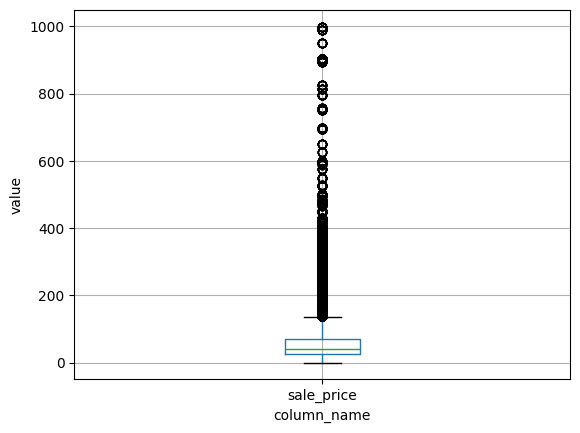

In [72]:
data.boxplot(column=['sale_price'], xlabel='column_name', ylabel='value')

In [73]:
fig = px.box(data, x ='year' ,y="sale_price", title='Sale Price Distribution')
fig.show()

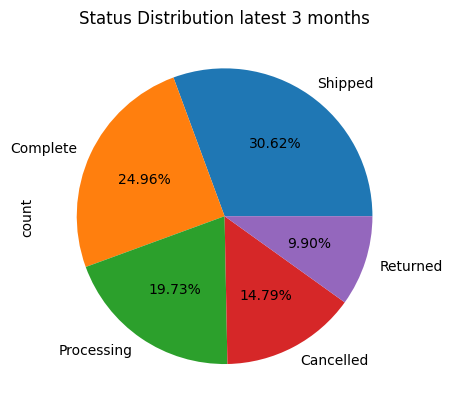

In [74]:
import matplotlib.pyplot as plt

data['month'] = data['created_at'].map(lambda ts: ts.month)
latest_data_month = data[data['month'] >= 10].copy()

# Use the 'latest_data_month' DataFrame to access the 'status' column
latest_data_month['status'].value_counts().plot.pie(title='Status Distribution latest 3 months', autopct='%.2f%%')

plt.show()

In [75]:
earliest_data = data[data['year'] == data.year.min()].copy()
earliest_data.head(10)

id  order_id  user_id  product_id  inventory_item_id      status  \
12   104337     72001    57692       28557             282086    Complete   
14   156200    107747    86418       28557             421922    Complete   
38    95661     66080    53065       28679             258708    Complete   
87   165919    114416    91762       24922             448288     Shipped   
128   63082     43479    34953        9002             170654  Processing   
270   38541     26547    21418       24572             104311     Shipped   
338   71710     49475    39816        9464             194011  Processing   
477   52900     36449    29328       24808             143107     Shipped   
495   64624     44537    35826        9505             174846    Returned   
546   30668     21123    17035       24707              82934     Shipped   

                   created_at                shipped_at  \
12  2019-10-19 19:21:07+07:00 2019-10-18 12:37:00+07:00   
14  2019-09-27 08:50:52+07:00 2019-09-27 20:44:00+07:00   
38  2019-07-26 21:30:15+07:00 2019-07-25 03:20:00+07:00   
87  2019-09-25 12:11:27+07:00 2019-09-26 18:08:00+07:00   
128 2019-07-22 08:00:11+07:00                       NaT   
270 2019-12-05 06:53:27+07:00 2019-12-05 18:50:00+07:00   
338 2019-06-11 19:01:28+07:00                       NaT   
477 2019-11-26 16:14:54+07:00 2019-11-29 13:39:00+07:00   
495 2019-08-24 22:30:42+07:00 2019-08-25 19:42:00+07:00   
546 2019-07-03 17:57:47+07:00 2019-07-05 00:07:00+07:00   

                 delivered_at               returned_at  sale_price  hour  \
12  2019-10-20 02:07:00+07:00                       NaT        3.25    12   
14  2019-10-02 17:16:00+07:00                       NaT        3.25     1   
38  2019-07-28 03:39:00+07:00                       NaT        3.50    14   
87                        NaT                       NaT        4.50     5   
128                       NaT                       NaT        5.00     1   
270                       NaT                       NaT        6.50    23   
338                       NaT                       NaT        6.50    12   
477                       NaT                       NaT        7.50     9   
495 2019-08-30 16:13:00+07:00 2019-09-02 15:26:00+07:00        7.50    15   
546                       NaT                       NaT        8.00    10   

     year  month  
12   2019     10  
14   2019      9  
38   2019      7  
87   2019      9  
128  2019      7  
270  2019     12  
338  2019      6  
477  2019     11  
495  2019      8  
546  2019      7

In [76]:
earliest_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4468 entries, 12 to 180936
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype                       
---  ------             --------------  -----                       
 0   id                 4468 non-null   int64                       
 1   order_id           4468 non-null   int64                       
 2   user_id            4468 non-null   int64                       
 3   product_id         4468 non-null   int64                       
 4   inventory_item_id  4468 non-null   int64                       
 5   status             4468 non-null   object                      
 6   created_at         4468 non-null   datetime64[ns, Asia/Jakarta]
 7   shipped_at         2866 non-null   datetime64[ns, Asia/Jakarta]
 8   delivered_at       1540 non-null   datetime64[ns, Asia/Jakarta]
 9   returned_at        469 non-null    datetime64[ns, Asia/Jakarta]
 10  sale_price         4468 non-null   float64                    

In [77]:
earliest_data.created_at.min(), earliest_data.created_at.max()

(Timestamp('2019-01-07 23:08:55+0700', tz='Asia/Jakarta'),
 Timestamp('2019-12-31 23:24:16+0700', tz='Asia/Jakarta'))

In [78]:
earliest_data['year'] = earliest_data['created_at'].map(lambda ts: ts.year)
earliest_data.head()

id  order_id  user_id  product_id  inventory_item_id      status  \
12   104337     72001    57692       28557             282086    Complete   
14   156200    107747    86418       28557             421922    Complete   
38    95661     66080    53065       28679             258708    Complete   
87   165919    114416    91762       24922             448288     Shipped   
128   63082     43479    34953        9002             170654  Processing   

                   created_at                shipped_at  \
12  2019-10-19 19:21:07+07:00 2019-10-18 12:37:00+07:00   
14  2019-09-27 08:50:52+07:00 2019-09-27 20:44:00+07:00   
38  2019-07-26 21:30:15+07:00 2019-07-25 03:20:00+07:00   
87  2019-09-25 12:11:27+07:00 2019-09-26 18:08:00+07:00   
128 2019-07-22 08:00:11+07:00                       NaT   

                 delivered_at returned_at  sale_price  hour  year  month  
12  2019-10-20 02:07:00+07:00         NaT        3.25    12  2019     10  
14  2019-10-02 17:16:00+07:00         NaT        3.25     1  2019      9  
38  2019-07-28 03:39:00+07:00         NaT        3.50    14  2019      7  
87                        NaT         NaT        4.50     5  2019      9  
128                       NaT         NaT        5.00     1  2019      7

In [79]:
grouped_data = earliest_data.groupby(
    by=['month','user_id'])['id'].count().reset_index(
        name='count').sort_values(
    ['month','count'], 
    ascending=False
).copy()
grouped_data.head()

month  user_id  count
3075     12    91601      5
2628     12     5541      4
2634     12     6889      4
2650     12     8386      4
2653     12     8575      4

In [80]:
grouped_data["rank"] = grouped_data.groupby(by=['month'])["count"].rank(method="first", ascending=False)
grouped_data.head(10)

month  user_id  count  rank
3075     12    91601      5   1.0
2628     12     5541      4   2.0
2634     12     6889      4   3.0
2650     12     8386      4   4.0
2653     12     8575      4   5.0
2662     12    11286      4   6.0
2740     12    28699      4   7.0
2763     12    34152      4   8.0
2764     12    34202      4   9.0
2800     12    40418      4  10.0

In [81]:
import plotly.express as px
top_10 = grouped_data.query("rank <= 10").sort_values(['month','rank'], ascending=[False,True]).copy()
top_10['rank'] = top_10['rank'].map(int)
fig = px.bar(top_10[['month','count','rank', 'user_id']], x="month", y="count",
             hover_data=['user_id'],
             color='rank',
             barmode='group',
             title=' top 10 ordered products shares in the earliest year',
             height=400)
fig.show()

In [82]:
import plotly.express as px

all_years_data = data.copy()

all_years_data.created_at.min(), all_years_data.created_at.max()
all_years_data['year'] = all_years_data['created_at'].map(lambda ts: ts.year)
all_years_data.head()

grouped_data = all_years_data.groupby(
    by=['year','user_id'])['id'].count().reset_index(
        name='count').sort_values(
    ['year','count'], 
    ascending=False
).copy()


grouped_data["rank"] = grouped_data.groupby(by=['year'])["count"].rank(method="first", ascending=False)
grouped_data.head(10)

top_10 = grouped_data.query("rank <= 10").sort_values(['year','rank'], ascending=[False,True]).copy()
top_10['rank'] = top_10['rank'].map(int)

fig = px.bar(top_10[['year','count','rank', 'user_id']], x="year", y="count",
             hover_data=['user_id'],
             color='rank',
             barmode='group',
             title='active customers in Year on Year ',
             height=400)

fig.show()